In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [2]:
#Read the file
import pandas
data=pd.read_csv("Elon_musk.csv",error_bad_lines=False)

In [3]:
data

,Unnamed: 0,Text
0,1,@kunalb11 I�m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
#Sentiment analysis
afinn = pd.read_csv('Afinn (1).csv', sep=',', encoding='latin-1')
afinn.shape

(2477, 2)

In [5]:
afinn.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [6]:
data = [Text.strip() for Text in data.Text] # remove both the leading and the trailing characters
data = [Text for Text in data if Text]

In [7]:
#tokenizing
from nltk import tokenize
sentences = tokenize.sent_tokenize(" ".join(data))
sentences[0:15]

['@kunalb11 I�m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It�s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my acc

In [8]:
sent_df = pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,@kunalb11 I�m an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
909,"@kenyanwalstreet Not actually a payout, just a..."
910,"It may never pay out, as the stock can�t b� ht..."
911,Details Aug 28.
912,AI symbiosis while u wait @vistacruiser7 @flcn...


In [9]:
#frequency of words
freq1 = pd.Series(' '.join(sent_df['sentence']).split()).value_counts()[:50] # for top 20
freq1

the                 403
to                  390
is                  347
a                   324
of                  301
&amp;               216
in                  203
for                 177
be                  154
@Erdayastronaut     140
@SpaceX             138
will                136
RT                  127
on                  124
@PPathole           123
@flcnhvy            114
I                   114
but                 109
that                104
with                 99
are                  95
it                   89
Tesla                85
at                   85
The                  79
we                   77
this                 72
and                  72
@SpaceX:             71
from                 70
have                 69
@WholeMarsBlog       68
was                  68
@Tesla               64
�                    64
as                   63
@teslaownersSV       62
This                 60
you                  58
We                   58
@Teslarati           56
has             

In [10]:
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91701\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\91701\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
my_stopwords = stopwords.words('english')
my_stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [12]:
#removing stopwords
sent_df['sentence1'] = sent_df['sentence'].apply(lambda x: ' '.join([x for x in x.split() if x not in (my_stopwords)]))

In [13]:
#removing punctuations
sent_df['clean'] = sent_df['sentence1'].apply(lambda x: ' '.join([x for x in x.split() if x not in string.punctuation]))

In [14]:
sent_df

,sentence,sentence1,clean
0,@kunalb11 I�m an alien @ID_AA_Carmack Ray trac...,@kunalb11 I�m alien @ID_AA_Carmack Ray tracing...,@kunalb11 I�m alien @ID_AA_Carmack Ray tracing...
1,Have you tried it?,Have tried it?,Have tried it?
2,@joerogan @Spotify Great interview!,@joerogan @Spotify Great interview!,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...,@gtera27 Doge underestimated @teslacn Congratu...,@gtera27 Doge underestimated @teslacn Congratu...
4,Now on to the next for even more!!,Now next even more!!,Now next even more!!
...,...,...,...
909,"@kenyanwalstreet Not actually a payout, just a...","@kenyanwalstreet Not actually payout, vesting ...","@kenyanwalstreet Not actually payout, vesting ..."
910,"It may never pay out, as the stock can�t b� ht...","It may never pay out, stock can�t b� https://t...","It may never pay out, stock can�t b� https://t..."
911,Details Aug 28.,Details Aug 28.,Details Aug 28.
912,AI symbiosis while u wait @vistacruiser7 @flcn...,AI symbiosis u wait @vistacruiser7 @flcnhvy Th...,AI symbiosis u wait @vistacruiser7 @flcnhvy Th...


In [15]:
sent_df=sent_df.drop('sentence',axis=1)

In [16]:
sent_df=sent_df.drop('sentence1',axis=1)

In [17]:
sent_df

,clean
0,@kunalb11 I�m alien @ID_AA_Carmack Ray tracing...
1,Have tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge underestimated @teslacn Congratu...
4,Now next even more!!
...,...
909,"@kenyanwalstreet Not actually payout, vesting ..."
910,"It may never pay out, stock can�t b� https://t..."
911,Details Aug 28.
912,AI symbiosis u wait @vistacruiser7 @flcnhvy Th...


In [18]:
from itertools import islice
def take(n,iterable):
    "Return first n items of the iterable as list"
    return list(islice(iterable,n))

In [19]:
#coverting to dic format and for 20 words
affinity_scores = afinn.set_index('word')['value'].to_dict()
take(20,affinity_scores.items())

[('abandon', -2),
 ('abandoned', -2),
 ('abandons', -2),
 ('abducted', -2),
 ('abduction', -2),
 ('abductions', -2),
 ('abhor', -3),
 ('abhorred', -3),
 ('abhorrent', -3),
 ('abhors', -3),
 ('abilities', 2),
 ('ability', 2),
 ('aboard', 1),
 ('absentee', -1),
 ('absentees', -1),
 ('absolve', 2),
 ('absolved', 2),
 ('absolves', 2),
 ('absolving', 2),
 ('absorbed', 1)]

In [34]:

nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_scores

def calculate_sentiment(Text: str = None):
    sent_score = 0
    if Text:
        clean = nlp(Text)
        for word in clean:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [35]:
#calulating the sentiment value for each sentence
sent_df['sentiment_value'] = sent_df['clean'].apply(calculate_sentiment)

In [36]:
sent_df['sentiment_value']

0      0
1      0
2      3
3      3
4      0
      ..
909    0
910   -4
911    0
912   -2
913    0
Name: sentiment_value, Length: 914, dtype: int64

In [37]:
#word count for "clean"column
sent_df['word_count'] = sent_df['clean'].str.split().apply(len)
sent_df['word_count'].head(10)

0     9
1     3
2     4
3    11
4     4
5     4
6     9
7    10
8     6
9    74
Name: word_count, dtype: int64

In [38]:
#sort based on sentiment value
sent_df.sort_values(by='sentiment_value').head(10)

,clean,sentiment_value,word_count,index
640,Very ba� https://t.co/tJsh1Exz1Q @justpaulinel...,-8,41,640
64,"Also, road hell mostly paved bad intentions.",-7,7,64
473,"He plays �poor inventor� card, rich along &amp...",-5,25,473
604,"Then static fire, checkouts, static fire, fly ...",-4,11,604
910,"It may never pay out, stock can�t b� https://t...",-4,21,910
672,"Occasional flights land ok, frequent (daily) f...",-4,27,672
217,@RGVaerialphotos It real soon @MarcusHouseGame...,-3,13,217
291,"No symptoms past days, apart fatigue.",-3,6,291
218,External� https://t.co/csIZk6sEVu @bcart03 @ne...,-3,22,218
623,You modern day moron.,-3,4,623


In [40]:
sent_df['sentiment_value'].describe() #max sentiment value=16 and min sentiment value=-8

count    914.000000
mean       1.405908
std        2.697694
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       16.000000
Name: sentiment_value, dtype: float64

In [41]:
#sentiment value less than or equal to 0
sent_df[sent_df['sentiment_value']<=0]

,clean,sentiment_value,word_count,index
0,@kunalb11 I�m alien @ID_AA_Carmack Ray tracing...,0,9,0
1,Have tried it?,0,3,1
4,Now next even more!!,0,4,4
6,"https://t.co/9WFKMYu2oj Frodo underdoge, All t...",-2,9,6
8,Tweets definitely represent real-world time al...,0,6,8
...,...,...,...,...
909,"@kenyanwalstreet Not actually payout, vesting ...",0,7,909
910,"It may never pay out, stock can�t b� https://t...",-4,21,910
911,Details Aug 28.,0,3,911
912,AI symbiosis u wait @vistacruiser7 @flcnhvy Th...,-2,30,912


In [42]:
#sentiment value greater than 0
sent_df[sent_df['sentiment_value']>0]

,clean,sentiment_value,word_count,index
2,@joerogan @Spotify Great interview!,3,4,2
3,@gtera27 Doge underestimated @teslacn Congratu...,3,11,3
5,Happy New Year Ox!,3,4,5
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...,2,10,7
9,The entertaining outcome likely @GiveDirectly ...,7,74,9
...,...,...,...,...
901,He one best.,3,3,901
903,"@Ali_Afshari In general, need improve podcasts...",4,72,903
905,"@burakaydik True Wow, IHOP &amp; GitHub close ...",7,12,905
907,This great &amp; terrifying.,3,4,907


In [43]:
sent_df['index']=range(0,len(sent_df))

In [44]:
sent_df

,clean,sentiment_value,word_count,index
0,@kunalb11 I�m alien @ID_AA_Carmack Ray tracing...,0,9,0
1,Have tried it?,0,3,1
2,@joerogan @Spotify Great interview!,3,4,2
3,@gtera27 Doge underestimated @teslacn Congratu...,3,11,3
4,Now next even more!!,0,4,4
...,...,...,...,...
909,"@kenyanwalstreet Not actually payout, vesting ...",0,7,909
910,"It may never pay out, stock can�t b� https://t...",-4,21,910
911,Details Aug 28.,0,3,911
912,AI symbiosis u wait @vistacruiser7 @flcnhvy Th...,-2,30,912


C:\Users\91701\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

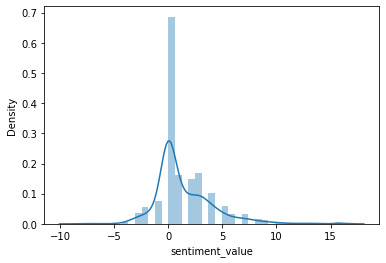

In [45]:
#densityplot based on sentiment value
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

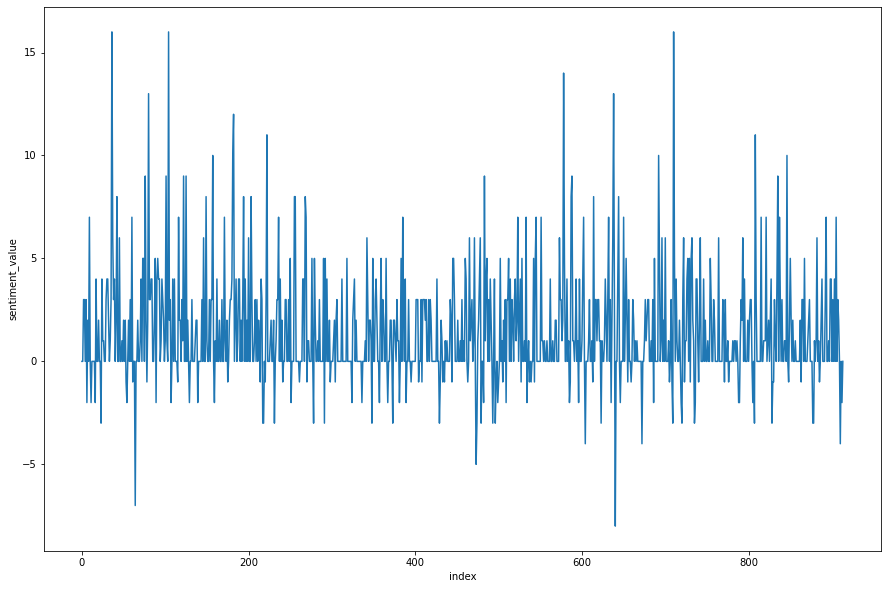

In [46]:
#lineplot based on sentiment value
plt.figure(figsize=(15, 10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

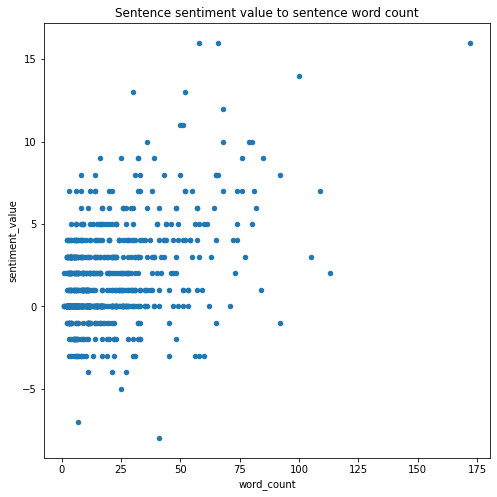

In [47]:
#scatterplot between wordcount and sentiment value
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

# AFTER PERFORMING SENTIMENT ANALYSIS WE CAN CONCLUDE THAT MOST SENTENCES OF IT ARE NEUTRAL